In [ ]:
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


## Not to overclock the GPU

In [ ]:
# from tensorflow.compat.v1 import ConfigProto
# from tensorflow.compat.v1 import InteractiveSession

# config = ConfigProto()
# config.gpu_options.per_process_gpu_memory_fraction = 0.5
# config.gpu_options.allow_growth = True
# session = InteractiveSession(config=config)

In [ ]:
from tensorflow.keras.layers import Dense, Input, Lambda, Flatten 
from tensorflow.keras.models import Model 
from tensorflow.keras.applications.resnet50 import ResNet50 
from tensorflow.keras.applications.resnet50 import preprocess_input 
from tensorflow.keras.preprocessing import image 
from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img 
from tensorflow.keras.models import Sequential
import numpy as np 
import glob as glob 


In [ ]:
IMGAE_SIZE = [224, 224]
train_path = '/content/drive/MyDrive/Dataset/Cotton_Diseases/train'
valid_path = '/content/drive/MyDrive/Dataset/Cotton_Diseases/test'

In [ ]:
resnet = ResNet50(input_shape=IMGAE_SIZE + [3], weights='imagenet', include_top=False)

In [ ]:
for layer in resnet.layers:
  layer.trainble = False

In [ ]:
num_classes = 4

In [ ]:
x = Flatten()(resnet.output)

In [ ]:
prediction = Dense(num_classes, activation='softmax')(x)

# Create a model object 
model = Model(inputs=resnet.input, outputs=prediction)

In [ ]:
model.summary()

Model: "model_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_2 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, 230, 230, 3)  0           input_2[0][0]                    
__________________________________________________________________________________________________
conv1_conv (Conv2D)             (None, 112, 112, 64) 9472        conv1_pad[0][0]                  
__________________________________________________________________________________________________
conv1_bn (BatchNormalization)   (None, 112, 112, 64) 256         conv1_conv[0][0]                 
____________________________________________________________________________________________

In [ ]:
model.compile(
    loss='categorical_crossentropy',
    optimizer='adam', 
    metrics=['accuracy']
)

In [ ]:
train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip=True)
test_datagen = ImageDataGenerator(rescale = 1./255)

In [ ]:
training_set = train_datagen.flow_from_directory('/content/drive/MyDrive/Dataset/Cotton_Diseases/train',
                                                 target_size = (224, 224),
                                                 batch_size = 32,
                                                 class_mode = 'categorical')

test_set = test_datagen.flow_from_directory('/content/drive/MyDrive/Dataset/Cotton_Diseases/test',
                                            target_size = (224, 224),
                                            batch_size = 32,
                                            class_mode = 'categorical'
                                            )

Found 1951 images belonging to 4 classes.
Found 18 images belonging to 4 classes.


In [ ]:
r = model.fit_generator(
    training_set,
    validation_data = test_set,
    epochs = 20,
    steps_per_epoch = len(training_set),
    validation_steps = len(test_set)
)

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/training.py:1844: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/20
61/61 [==============================] - 611s 9s/step - loss: 4.9667 - accuracy: 0.6602 - val_loss: 235114.5625 - val_accuracy: 0.2778
Epoch 2/20
61/61 [==============================] - 41s 670ms/step - loss: 1.8865 - accuracy: 0.7754 - val_loss: 4.3837 - val_accuracy: 0.1667
Epoch 3/20
61/61 [==============================] - 40s 658ms/step - loss: 0.3175 - accuracy: 0.8804 - val_loss: 2.3302 - val_accuracy: 0.2778
Epoch 4/20
61/61 [==============================] - 41s 662ms/step - loss: 0.1938 - accuracy: 0.9313 - val_loss: 4.3498 - val_accuracy: 0.2778
Epoch 5/20
61/61 [==============================] - 40s 659ms/step - loss: 0.1241 - accuracy: 0.9631 - val_loss: 1.8979 - val_accuracy: 0.1111
Epoch 6/20
61/61 [==============================] - 40s 656ms/step - loss: 0.0932 - accuracy: 0.9704 - val_loss: 3.8857 - val_accuracy: 0.2778
Epoch 7/20
61/61 [==============================] - 40s 655ms/step - loss: 0.0793 - accuracy: 0.9749 - val_loss: 7.6708 - val_accuracy: 0.2

In [ ]:
import matplotlib.pyplot as plt 

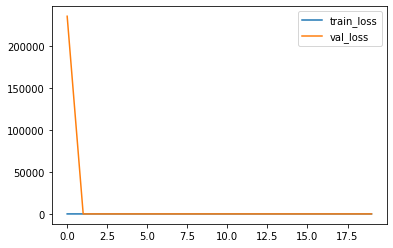

<Figure size 432x288 with 0 Axes>

In [ ]:
## plot the loss 
plt.plot(r.history['loss'], label='train_loss')
plt.plot(r.history['val_loss'], label='val_loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss_resnet50')

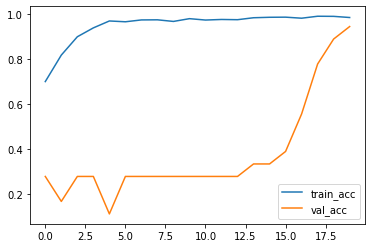

<Figure size 432x288 with 0 Axes>

In [ ]:
plt.plot(r.history['accuracy'], label='train_acc')
plt.plot(r.history['val_accuracy'], label='val_acc')
plt.legend()
plt.show()
plt.savefig('AccVal_acc_resnet50')

In [ ]:
import pickle

In [ ]:
model.save('/content/drive/MyDrive/model_resnet50.h5')

In [ ]:
pred = model.predict(test_set)

In [ ]:
y_pred = np.argmax(pred, axis=1)

In [ ]:
test_set[0][1]

array([[0., 0., 1., 0.],
       [0., 0., 1., 0.],
       [0., 1., 0., 0.],
       [1., 0., 0., 0.],
       [0., 0., 0., 1.],
       [1., 0., 0., 0.],
       [0., 0., 1., 0.],
       [0., 1., 0., 0.],
       [0., 0., 0., 1.],
       [0., 0., 1., 0.],
       [0., 0., 1., 0.],
       [0., 0., 0., 1.],
       [0., 0., 0., 1.],
       [0., 1., 0., 0.],
       [0., 0., 0., 1.],
       [1., 0., 0., 0.],
       [0., 1., 0., 0.],
       [0., 1., 0., 0.]], dtype=float32)

In [ ]:
y_pred

array([1, 0, 1, 2, 1, 3, 1, 3, 3, 2, 0, 1, 3, 2, 2, 0, 2, 1])